In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
pip install keras-tuner --upgrade


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 9.9 MB/s eta 0:00:00


In [4]:
!pip install keras-tuner --upgrade


In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, matthews_corrcoef
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from keras_tuner import BayesianOptimization
import scipy.stats as stats
from collections import Counter


In [14]:
# Load dataset
dt = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Ayesha/Hybrid_testing_code.csv")

In [15]:
dt.head()

,Label,AA,AB,AC,AD,AS,AF,AG,AH,AJ,...,LH,LJ,LK,LL,LM,LN,LB,LV,LC,LX
0,1,0.000000,0.600000,4.000000e-01,0.200000,0.400000,4.000000e-01,0.4,0.2,0.4,...,0.000000,0.000000,0.000000,0.000000,0.000000,80.0,80.0,80.0,80.0,100.0
1,1,0.333333,0.666667,1.110000e-16,0.333333,0.666667,1.110000e-16,1.0,0.0,0.0,...,66.666667,66.666667,66.666667,66.666667,66.666667,0.0,0.0,0.0,0.0,0.0
2,1,0.000000,0.500000,5.000000e-01,0.500000,0.500000,0.000000e+00,0.5,0.5,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
3,1,0.000000,0.000000,1.000000e+00,0.000000,0.500000,5.000000e-01,0.0,0.5,0.5,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
4,1,0.000000,1.000000,0.000000e+00,0.000000,0.500000,5.000000e-01,0.5,0.0,0.5,...,0.000000,0.000000,0.000000,0.000000,0.000000,75.0,75.0,75.0,75.0,100.0


In [16]:
dt.tail()

,Label,AA,AB,AC,AD,AS,AF,AG,AH,AJ,...,LH,LJ,LK,LL,LM,LN,LB,LV,LC,LX
84,0,0.000000,0.750000,0.250000,0.750000,0.000000,0.250000,0.750000,0.000000,0.250000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
85,0,0.272727,0.454545,0.272727,0.454545,0.090909,0.454545,0.545455,0.090909,0.363636,...,9.090909,9.090909,9.090909,36.363636,72.727273,45.454545,45.454545,54.545455,63.636364,100.000000
86,0,0.285714,0.285714,0.428571,0.142857,0.142857,0.714286,0.285714,0.000000,0.714286,...,57.142857,57.142857,57.142857,57.142857,100.000000,28.571429,28.571429,28.571429,28.571429,42.857143
87,0,0.250000,0.500000,0.250000,0.250000,0.000000,0.750000,0.250000,0.000000,0.750000,...,100.000000,100.000000,100.000000,100.000000,100.000000,50.000000,50.000000,50.000000,50.000000,75.000000
88,0,0.500000,0.500000,0.000000,0.000000,0.500000,0.500000,0.500000,0.000000,0.500000,...,100.000000,100.000000,100.000000,100.000000,100.000000,50.000000,50.000000,50.000000,50.000000,50.000000


In [17]:
import scipy.stats as stats

zscores = stats.zscore(dt)
print(zscores)

       Label        AA        AB        AC        AD        AS        AF  \
0   1.475998 -1.007643  0.797053  0.096241 -0.516178  0.883637 -0.233157   
1   1.475998  0.334838  1.034571 -1.357711 -0.051794  1.994234 -1.691144   
2   1.475998 -1.007643  0.440776  0.459729  0.528686  1.300111 -1.691144   
3   1.475998 -1.007643 -1.340610  2.277170 -1.212753  1.300111  0.131340   
4   1.475998 -1.007643  2.222162 -1.357711 -1.212753  1.300111  0.131340   
..       ...       ...       ...       ...       ...       ...       ...   
84 -0.677507 -1.007643  1.331469 -0.448991  1.399405 -0.782258 -0.779902   
85 -0.677507  0.090750  0.278832 -0.366380  0.370373 -0.403646 -0.034340   
86 -0.677507  0.143055 -0.322675  0.200095 -0.715199 -0.187295  0.912405   
87 -0.677507 -0.000783  0.440776 -0.448991 -0.342034 -0.782258  1.042582   
88 -0.677507  1.006078  0.440776 -1.357711 -1.212753  1.300111  0.131340   

          AG        AH        AJ  ...        LH        LJ        LK        LL  \
0  -0.

In [18]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

normalized_data = scaler.fit_transform(dt)

print(normalized_data)

[[1.         0.         0.6        ... 0.8        0.8        1.        ]
 [1.         0.33333333 0.66666667 ... 0.         0.         0.        ]
 [1.         0.         0.5        ... 0.         0.         0.        ]
 ...
 [0.         0.28571429 0.28571429 ... 0.28571429 0.28571429 0.42857143]
 [0.         0.25       0.5        ... 0.5        0.5        0.75      ]
 [0.         0.5        0.5        ... 0.5        0.5        0.5       ]]


In [19]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Columns: 295 entries, Label to LX
dtypes: float64(294), int64(1)
memory usage: 205.2 KB


<Axes: xlabel='Label'>

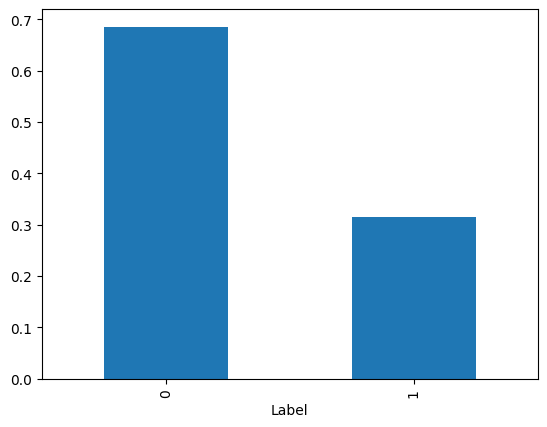

In [20]:
dt.Label.value_counts(normalize=True).plot.bar()

In [21]:
# Get the minority class
minority_class = dt[dt["Label"] == 0]

In [22]:
# Generate augmented data for the minority class
augmented_data = []
for i in range(len(minority_class)):
    row = minority_class.iloc[i]
    augmented_data.append(row)

In [23]:
    # Generate random noise
    noise = np.random.normal(0, 0.1, len(row.drop("Label")))

In [24]:
    # Add the noise to the current row
    augmented_row = row.drop("Label") + noise
    augmented_row["Label"] = 0
    augmented_data.append(augmented_row)

In [25]:
# Combine the original and augmented data
dt = pd.concat([dt, pd.DataFrame(augmented_data)])

In [26]:
# Shuffle the data
dt = dt.sample(frac=1).reset_index(drop=True)

In [27]:
dt.describe()

,Label,AA,AB,AC,AD,AS,AF,AG,AH,AJ,...,LH,LJ,LK,LL,LM,LN,LB,LV,LC,LX
count,151.00000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,...,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000
mean,0.18543,0.228219,0.376359,0.394559,0.307301,0.187945,0.506782,0.441205,0.088805,0.471663,...,30.437577,30.472151,31.559846,34.024338,44.179598,23.635772,23.960162,25.615362,29.629442,41.681914
std,0.38994,0.238440,0.274328,0.272660,0.267694,0.239274,0.266975,0.267594,0.180562,0.259254,...,35.514114,35.489698,35.331434,35.958523,41.261239,26.924877,26.875061,27.213444,30.404541,40.485919
min,0.00000,0.000000,0.000000,-0.058633,-0.055750,0.000000,0.000000,0.000000,-0.008650,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000,0.000000,0.222222,0.000000,0.000000,0.333333,0.250000,0.000000,0.333333,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.00000,0.166667,0.428571,0.428571,0.333333,0.142857,0.500000,0.500000,0.000000,0.500000,...,14.285714,14.285714,16.666667,25.000000,50.000000,16.666667,20.000000,27.272727,33.333333,44.444444
75%,0.00000,0.400000,0.500000,0.500000,0.500000,0.333333,0.666667,0.571429,0.142857,0.645833,...,50.000000,50.000000,50.000000,58.974359,88.888889,40.000000,40.000000,42.857143,50.000000,80.000000
max,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,100.044538,100.136936,100.000000,100.149877,100.001954,100.000000,100.000000,100.000000,100.000000,100.000000


In [28]:
dt.isnull().sum()

,0
Label,0
AA,0
AB,0
AC,0
AD,0
...,...
LN,0
LB,0
LV,0
LC,0


In [29]:
mean=dt.mean()

In [30]:
dt.fillna(value=mean, inplace=True)

In [31]:
corr_matrix=dt.corr()

In [32]:
dt.corr()

,Label,AA,AB,AC,AD,AS,AF,AG,AH,AJ,...,LH,LJ,LK,LL,LM,LN,LB,LV,LC,LX
Label,1.000000,0.305440,-0.002371,-0.263207,0.441816,0.034043,-0.477151,0.368195,0.062293,-0.426514,...,0.209129,0.208807,0.195005,0.201058,0.226362,-0.050178,-0.056049,-0.056547,-0.098192,-0.129212
AA,0.305440,1.000000,-0.446723,-0.429695,0.314911,0.190978,-0.475753,0.423246,-0.079093,-0.372285,...,0.518706,0.519202,0.541926,0.603853,0.727514,-0.050363,-0.048159,-0.045857,-0.071219,-0.149326
AB,-0.002371,-0.446723,1.000000,-0.615175,0.140883,-0.063559,-0.084981,0.091984,-0.128671,-0.005909,...,-0.196895,-0.196823,-0.194244,-0.212039,-0.243394,0.415020,0.419179,0.443167,0.477796,0.540807
AC,-0.263207,-0.429695,-0.615175,1.000000,-0.412814,-0.109678,0.499517,-0.465822,0.200344,0.330475,...,-0.261751,-0.262267,-0.284635,-0.320589,-0.395635,-0.376648,-0.382705,-0.408629,-0.420545,-0.414202
AD,0.441816,0.314911,0.140883,-0.412814,1.000000,-0.450493,-0.609309,0.641318,-0.207513,-0.526232,...,0.160199,0.160564,0.169807,0.224003,0.244785,-0.256827,-0.259538,-0.238549,-0.228440,-0.251419
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LN,-0.050178,-0.050363,0.415020,-0.376648,-0.256827,0.084473,0.189325,-0.216290,0.034692,0.205472,...,0.110808,0.110606,0.122386,0.115266,0.101992,1.000000,0.997285,0.965531,0.861405,0.747769
LB,-0.056049,-0.048159,0.419179,-0.382705,-0.259538,0.089768,0.187166,-0.223247,0.045611,0.204936,...,0.103827,0.104068,0.121103,0.120013,0.114978,0.997285,1.000000,0.977877,0.880727,0.764658
LV,-0.056547,-0.045857,0.443167,-0.408629,-0.238549,0.085831,0.169112,-0.223261,0.062234,0.192917,...,0.101389,0.102382,0.127722,0.141150,0.171442,0.965531,0.977877,1.000000,0.937217,0.829025
LC,-0.098192,-0.071219,0.477796,-0.420545,-0.228440,0.067891,0.173266,-0.254140,0.078622,0.211855,...,0.050198,0.051742,0.090046,0.122472,0.197710,0.861405,0.880727,0.937217,1.000000,0.902247


In [33]:
corr_matrix['Label'].sort_values(ascending=False)

,Label
Label,1.000000
BW,0.676407
BR,0.660028
BM,0.626445
CS,0.624807
...,...
BQ,-0.621192
CA,-0.623723
BN,-0.627423
BT,-0.660163


In [34]:
dt = dt.replace(to_replace="Label",value='0')

In [35]:
dt['Label'].unique()

array([0., 1.])

In [36]:
dt.dtypes


,0
Label,float64
AA,float64
AB,float64
AC,float64
AD,float64
...,...
LN,float64
LB,float64
LV,float64
LC,float64


In [37]:
convert_dict = {'Label': float}

In [38]:
dt = dt.astype(convert_dict)
print(dt.dtypes)

Label    float64
AA       float64
AB       float64
AC       float64
AD       float64
          ...   
LN       float64
LB       float64
LV       float64
LC       float64
LX       float64
Length: 295, dtype: object


In [39]:
dt.fillna(999, inplace=True)

In [40]:
X = dt.drop(['Label'],axis=1)
Y=dt['Label']
print(Y)

0      0.0
1      0.0
2      0.0
3      1.0
4      0.0
      ... 
146    0.0
147    0.0
148    0.0
149    0.0
150    1.0
Name: Label, Length: 151, dtype: float64


In [41]:
from imblearn.over_sampling import SMOTE

In [42]:
oversample = SMOTE()
X, Y = oversample.fit_resample(X, Y)

In [43]:
from collections import Counter

counter = Counter(Y)
print(counter)

Counter({0.0: 123, 1.0: 123})


In [44]:
from sklearn import preprocessing
lab = preprocessing.LabelEncoder()
Y = lab.fit_transform(Y)

In [45]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
scaler.fit(dt)
scaled= scaler.transform(dt)

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=46)
X_train.shape

(196, 294)

In [47]:
print(f"Rows in train set: {len(X_train)}\nRows in test set: {len(X_test)}\n")
print(f"Rows in train set: {len(y_train)}\nRows in test set: {len(y_test)}\n")

Rows in train set: 196
Rows in test set: 50

Rows in train set: 196
Rows in test set: 50



In [48]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

In [49]:
from sklearn.decomposition import PCA
pca=PCA(0.95)
X_pca=pca.fit_transform(X)
X_pca.shape

(246, 23)

In [50]:
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, Y, test_size=0.2, random_state=46)
X_train.shape

(196, 294)

Trial 10 Complete [00h 00m 14s]
val_accuracy: 0.6000000238418579

Best val_accuracy So Far: 1.0
Total elapsed time: 00h 02m 23s
Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - accuracy: 0.5288 - loss: 0.6810 - val_accuracy: 0.7400 - val_loss: 0.6141
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6606 - loss: 0.6098 - val_accuracy: 0.7400 - val_loss: 0.5307
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7867 - loss: 0.5352 - val_accuracy: 0.7800 - val_loss: 0.4979
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8255 - loss: 0.4653 - val_accuracy: 0.8200 - val_loss: 0.4509
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8139 - loss: 0.4391 - val_accuracy: 0.8200 - val_loss: 0.4010
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8269 - loss: 0.3899 - val_accuracy: 0.8200 - val_loss: 0.3982
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8563 - loss: 0.3994 - val_accuracy: 0.8200 - val_los

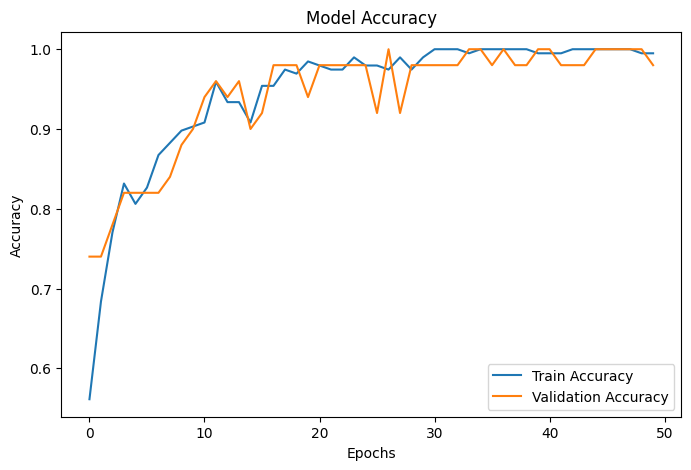

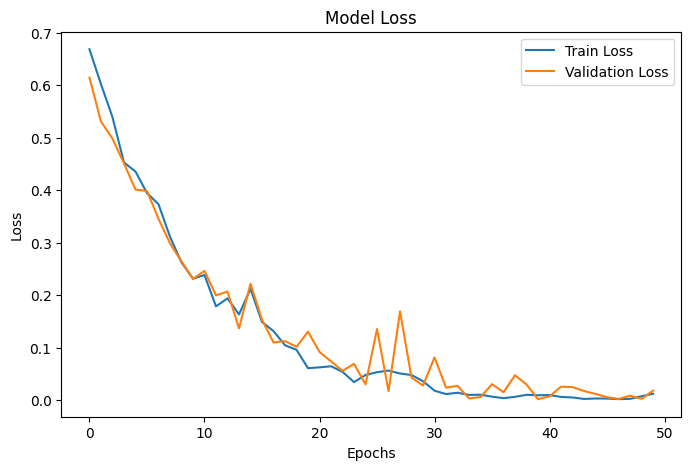

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9867 - loss: 0.0126
Test Accuracy: 0.9800000190734863
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
Sensitivity: 1.0000
Specificity: 0.9583
MCC: 0.9606


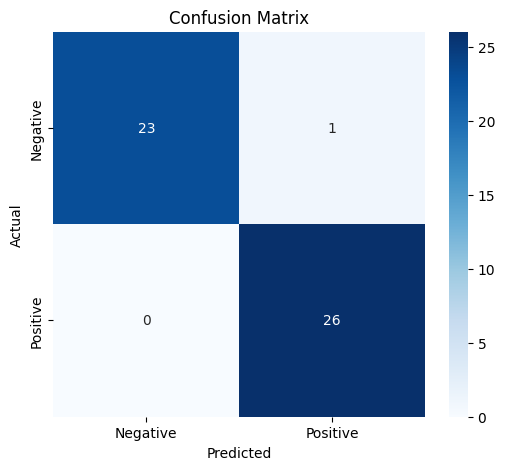

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


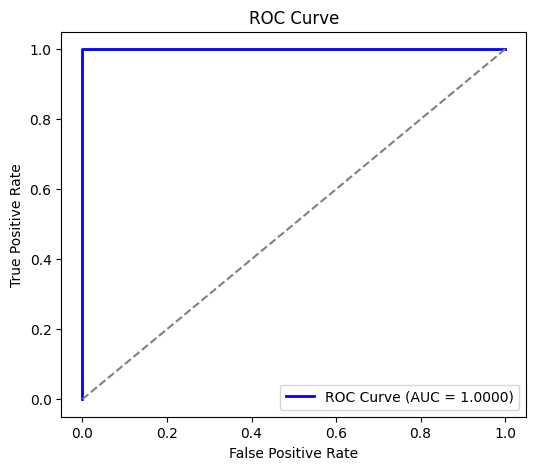

In [52]:
# Build Bayesian Optimized Model
def build_model(hp):
    model = Sequential()
    model.add(Dense(units=hp.Int('units_input', 32, 128, step=8), activation='relu', input_shape=(X_train.shape[1],)))
    for i in range(hp.Int('num_layers', 1, 3)):
        model.add(Dense(units=hp.Int(f'units_{i}', 32, 128, step=8), activation='relu'))
        model.add(Dropout(rate=hp.Float(f'dropout_{i}', 0.1, 0.5, sampling='log')))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=tf.keras.optimizers.Adam(hp.Float('learning_rate', 1e-7, 1e-2, sampling='log')),
                  loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Bayesian Optimization
tuner = BayesianOptimization(build_model, objective='val_accuracy', max_trials=10, directory='/content/drive/MyDrive/Colab Notebooks/Ayesha', project_name='bayesian_opt')
tuner.search(X_train, y_train, epochs=50, validation_data=(X_test, y_test), batch_size=32, callbacks=[EarlyStopping(monitor='val_loss', patience=10)])

# Best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
model = tuner.hypermodel.build(best_hps)
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), batch_size=32, callbacks=[EarlyStopping(monitor='val_loss', patience=10)])

# Plot Accuracy
plt.figure(figsize=(8, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

# Plot Loss
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

# Evaluate model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy}")

y_pred = (model.predict(X_test) > 0.5).astype("int32")
cm = confusion_matrix(y_test, y_pred)

# Compute Sensitivity, Specificity, MCC
TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]

sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)
mcc = matthews_corrcoef(y_test, y_pred)

print(f"Sensitivity: {sensitivity:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"MCC: {mcc:.4f}")

# Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# ROC Curve
y_prob = model.predict(X_test)
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


In [53]:
from sklearn.metrics import classification_report
# Print Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        24
           1       0.96      1.00      0.98        26

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50

